In [3]:
import os
import glob
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils #, plot_utils
import dynamic_routing_analysis as dra

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fm.FontProperties().set_family('arial')

%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [4]:
#set path to decoding results
# loadpath=dra.DECODING_ROOT_PATH / "new_annotations" / "linear_shift_20_units_re_run"
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_plus_all"
# loadpath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\shailaja\population_decoding"
# loadpath=r"D:\decoding_results_from_CO\2024-10-31"
# loadpath=r"D:\decoding_results_from_CO\n_units_test_2024-11-06"
# loadpath=r"D:\decoding_results_from_CO\n_units_test_medium_unit_criteria_2024-11-07"
# loadpath=r"D:\decoding_results_from_CO\lda_test_2024-11-11"
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\test_same_5_folds"
# loadpath=r"D:\decoding_results_from_CO\logreg_re_concat_2024-11-25"
# loadpath=r"D:\decoding_results_from_CO\logreg_2024-11-27_re_concat_1"
loadpath=r"D:\decoding_results_from_CO\logreg_many_n_units_2024_12_17"


files=glob.glob(os.path.join(loadpath,'*_decoding_results*.pkl'))
# files=glob.glob(os.path.join(loadpath,'*_test_same_5_folds.pkl'))

## plot single session linear shift decoder results

In [ ]:
files[0]

In [ ]:
#plot decoding results from one session
sel_session=1

plot_utils.plot_single_session_decoding_results(path=files[sel_session])

## load or concat decoder results across sessions

In [5]:
# load all decoding results, option to concatenate all sessions
concat_session_results=False
save_table=False
return_table=False

# all_decoder_results_path=os.path.join(loadpath,'combined','all_unit_linear_shift_use_more_trials.csv')
# all_decoder_results_path=loadpath / 'combined' / 'all_unit_linear_shift_use_more_trials.csv'

all_decoder_results_path=os.path.join(loadpath,'decoder_results_summary.csv')

# all_decoder_results_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\shailaja\population_decoding\all_unit_linear_shift_use_more_trials.csv"

if save_table:
    # savepath = (
    #     dra.DECODING_ROOT_PATH
    #     / "new_annotations"
    #     / "linear_shift_20_units_re_run"
    #     / "combined"
    # )
    savepath=os.path.join(loadpath,'combined')
else:
    savepath=None

if concat_session_results:
    all_decoder_results=decoding_utils.concat_decoder_results(files[0:1],savepath=savepath,return_table=return_table,single_session=True)
else:
    all_decoder_results=pd.read_csv(all_decoder_results_path)

In [6]:
all_decoder_results

,Unnamed: 0.1,Unnamed: 0,session_id,project,area,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units,probe,...,null_accuracy_median_50,null_accuracy_std_50,p_value_50,true_accuracy_all_trials_no_shift_50,true_accuracy_all,null_accuracy_mean_all,null_accuracy_median_all,null_accuracy_std_all,p_value_all,true_accuracy_all_trials_no_shift_all
0,0,0,662892_2023-08-24,DynamicRouting,root,3600.000000,6334.782609,3443.478261,23,A,...,NaN,NaN,NaN,NaN,0.851098,0.678106,0.660000,0.098392,0.013699,0.856722
1,1,1,662892_2023-08-24,DynamicRouting,lot,3600.000000,6189.772727,3488.636364,22,NaN,...,NaN,NaN,NaN,NaN,0.841220,0.663009,0.660366,0.109178,0.027397,0.848067
2,2,2,662892_2023-08-24,DynamicRouting,PIR,3527.339572,5506.885027,3688.703209,374,NaN,...,0.562454,0.031535,0.095890,0.639229,0.707134,0.616500,0.602622,0.049324,0.041096,0.712451
3,3,3,662892_2023-08-24,DynamicRouting,AIv,3500.000000,4734.782609,3841.304348,23,NaN,...,NaN,NaN,NaN,NaN,0.672805,0.568014,0.560732,0.064324,0.027397,0.658768
4,4,4,662892_2023-08-24,DynamicRouting,ORBl,3409.114583,4115.234375,3906.901042,192,NaN,...,0.640761,0.067540,0.027397,0.776094,0.794085,0.644242,0.635366,0.062903,0.013699,0.800549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,21,21,703333_2024-04-09,DynamicRouting,all,6943.090909,3140.254545,3904.018182,1375,NaN,...,0.549871,0.016692,0.073171,0.593846,0.658580,0.599566,0.613011,0.053643,0.097561,0.650349
74,22,22,703333_2024-04-09,DynamicRouting,ACAd,4845.357143,1739.821429,5330.000000,140,all,...,0.555677,0.026853,0.048780,0.615454,0.645284,0.583058,0.586799,0.037431,0.024390,0.659457
75,23,23,703333_2024-04-09,DynamicRouting,ACAv,5518.382353,2037.254902,5293.137255,102,all,...,0.544200,0.022568,0.170732,0.595705,0.612008,0.563491,0.560265,0.032400,0.048780,0.651835
76,24,24,703333_2024-04-09,DynamicRouting,MOs,4347.804054,1443.750000,5203.716216,148,all,...,0.520814,0.014237,0.609756,0.540163,0.488333,0.534069,0.531989,0.041618,0.878049,0.567034


In [9]:
n_units=[]
for col in all_decoder_results.filter(like='true_accuracy_').columns.values:
    if 'no_shift' in col:
            continue
    if len(col.split('_'))==3:
        temp_n_units=col.split('_')[2]
        try:
            n_units.append(int(temp_n_units))
        except:
            n_units.append(temp_n_units)
    else:
        n_units.append(None)

n_units

[5, 10, 20, 30, 40, 50, 'all']

In [11]:
#compute fraction significant, difference from null for DynamicRouting and Templeton projects
all_frac_sig_df,all_diff_from_null_df=decoding_utils.compute_significant_decoding_by_area(all_decoder_results)

## plot decoding accuracy across areas for DR sessions

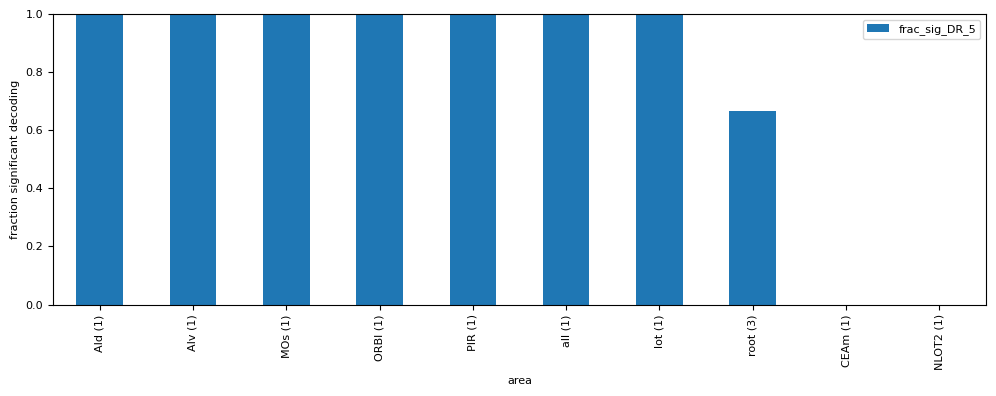

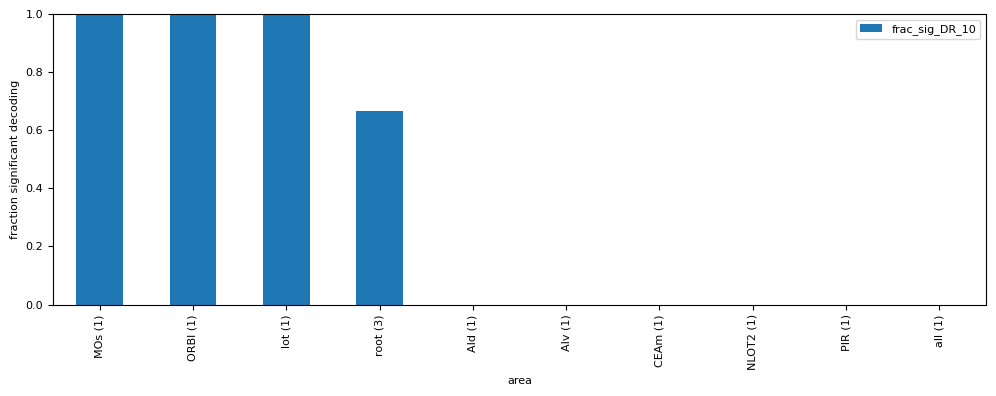

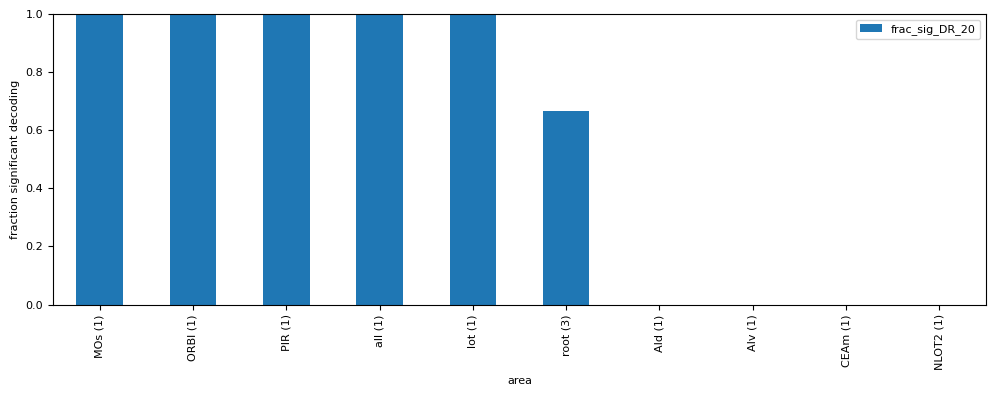

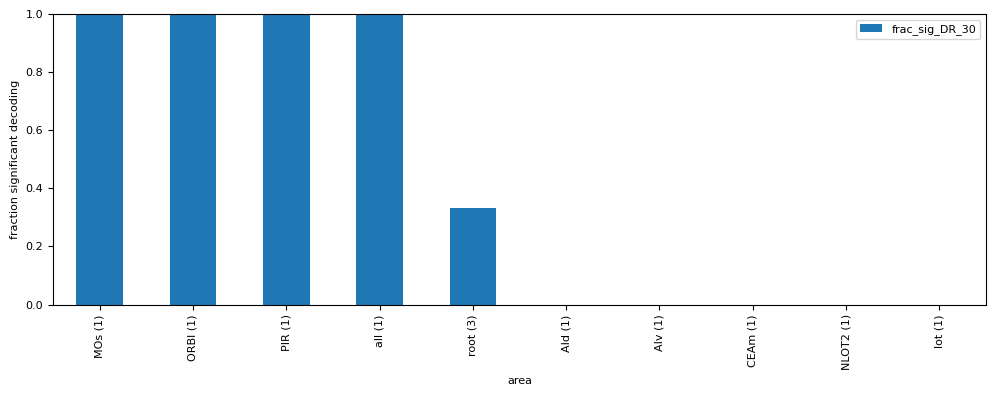

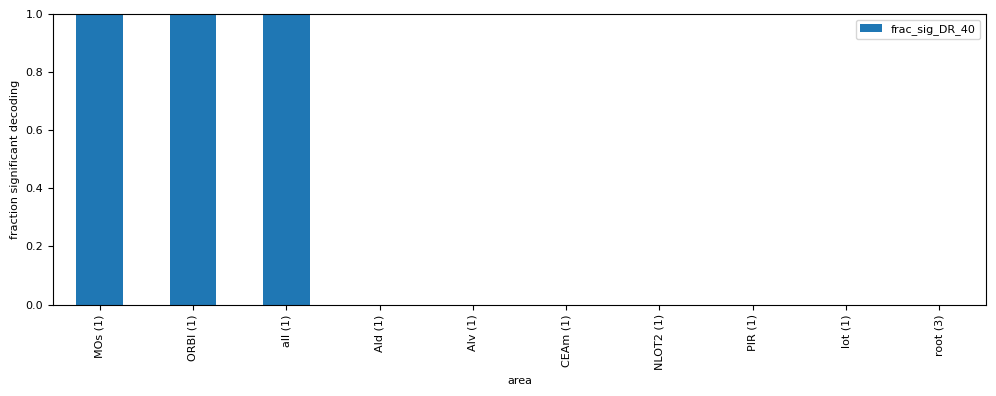

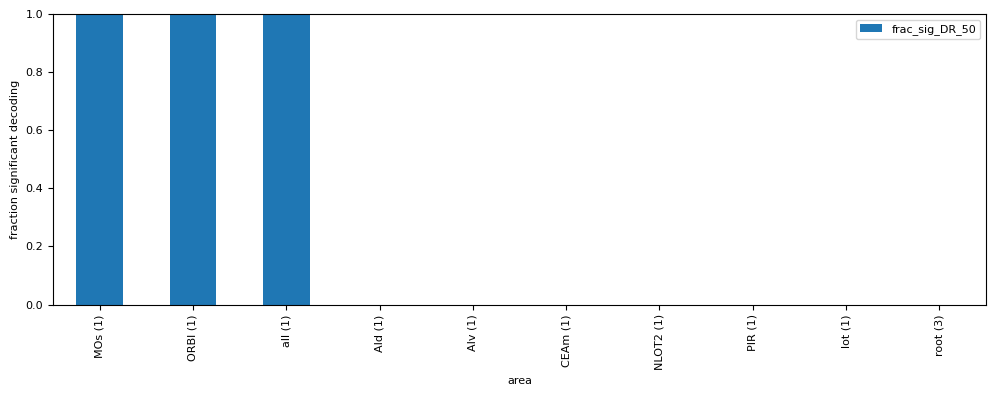

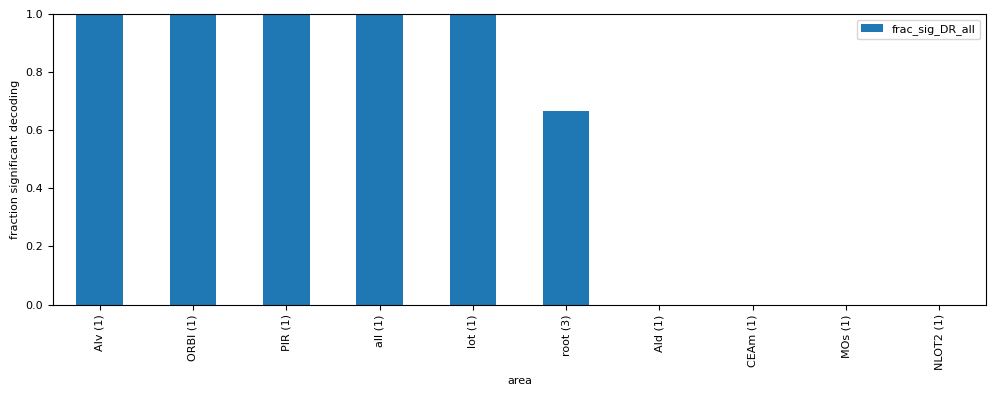

In [13]:
#barplot sorted by fraction significant
min_n_expts=1

n_units=[]
for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
    if 'no_shift' in col:
            continue
    if len(col.split('_'))==4:
        n_units.append('_'+col.split('_')[3])
    else:
        n_units.append('')

for nu in n_units:
    plot_DR_frac_sig_df=all_frac_sig_df.query('n_expts_DR>=@min_n_expts').sort_values('frac_sig_DR'+nu,ascending=False)
    fig,ax=plt.subplots(1,1,figsize=(10,4))
    plot_DR_frac_sig_df.plot.bar(x='area',y=['frac_sig_DR'+nu],ax=ax)
    ax.set_ylabel('fraction significant decoding')

    area_labels=[]
    for i in range(plot_DR_frac_sig_df.shape[0]):
        area_labels.append(plot_DR_frac_sig_df['area'].iloc[i]+' ('+str(int(plot_DR_frac_sig_df['n_expts_DR'].iloc[i]))+')')
    ax.set_xticklabels(area_labels,rotation=90,ha='center')
    ax.set_ylim([0,1])
    fig.tight_layout()



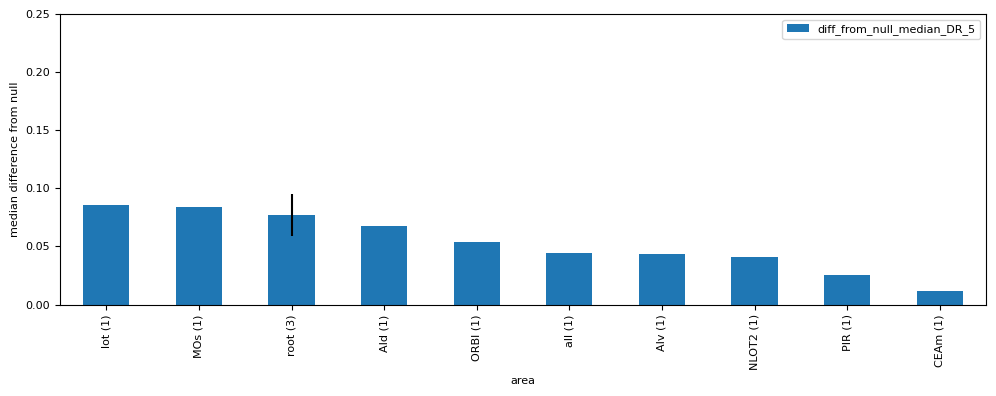

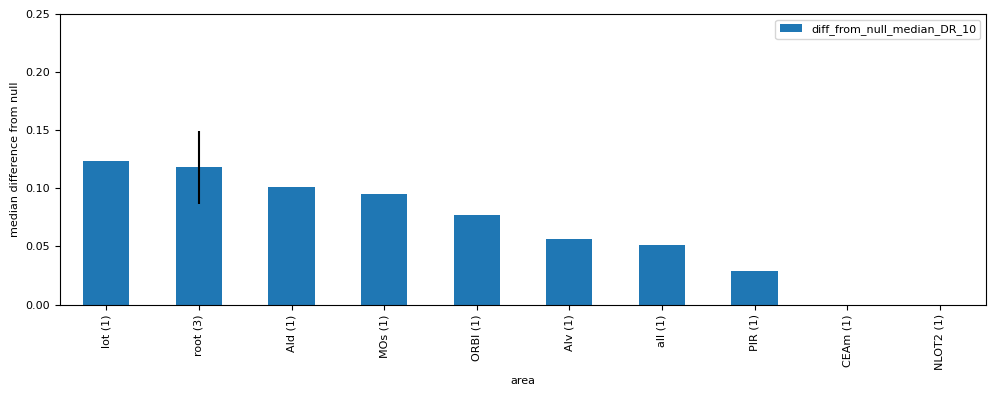

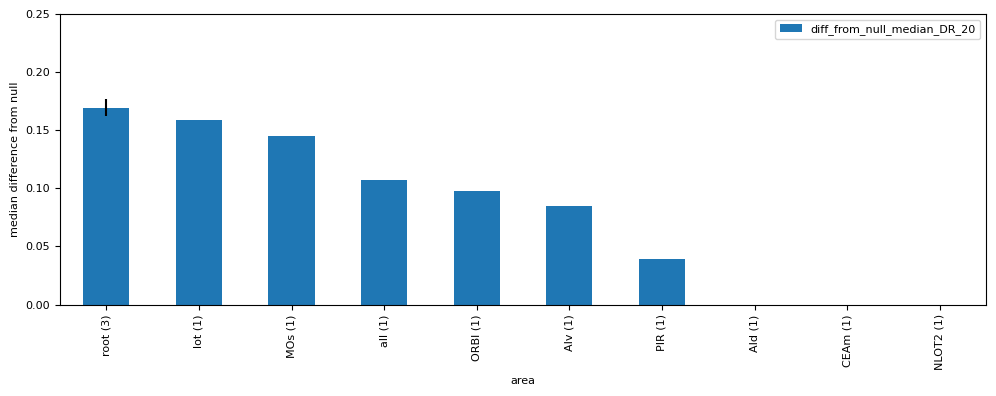

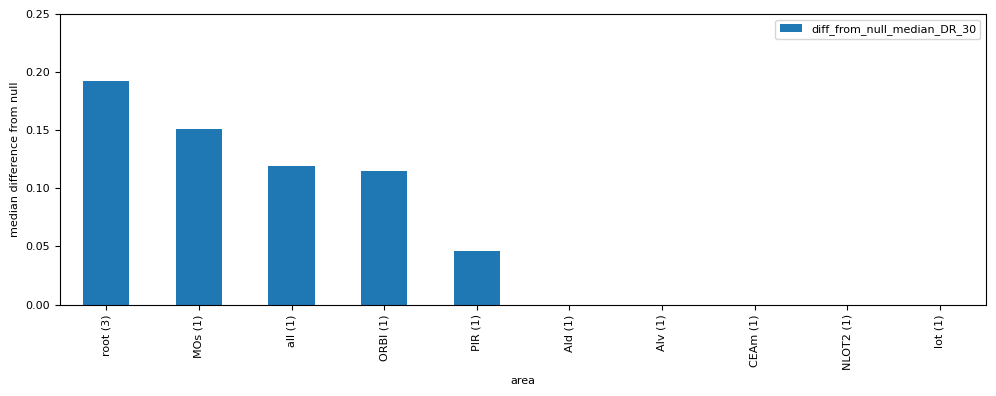

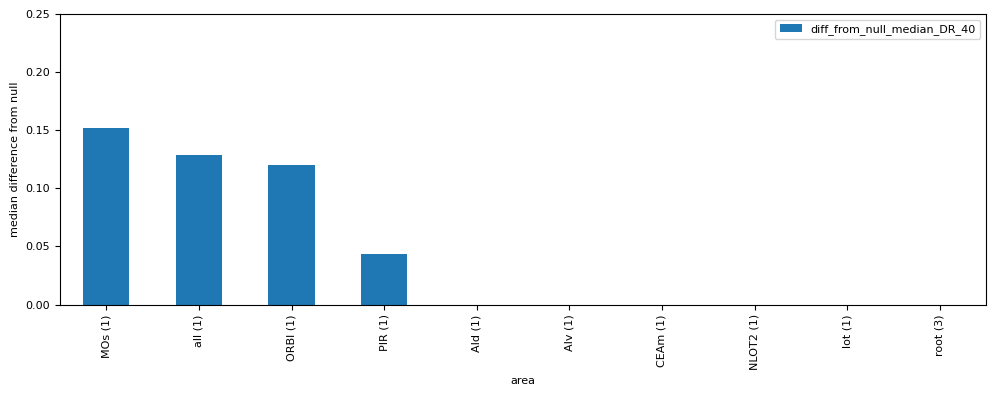

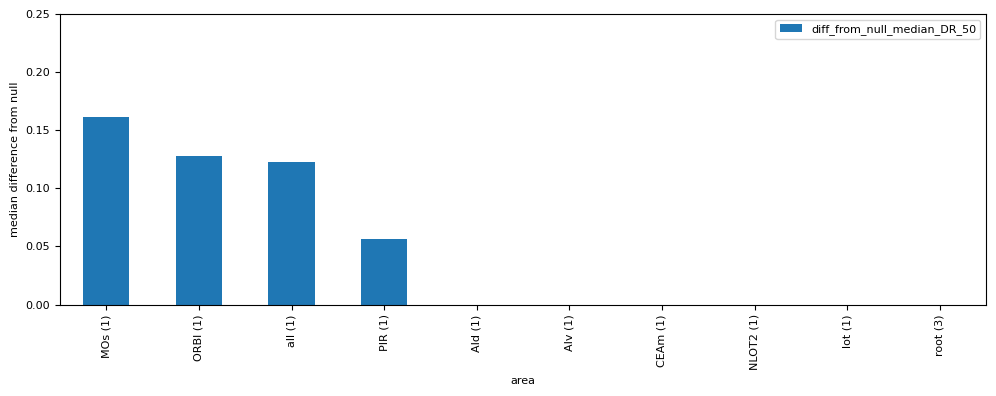

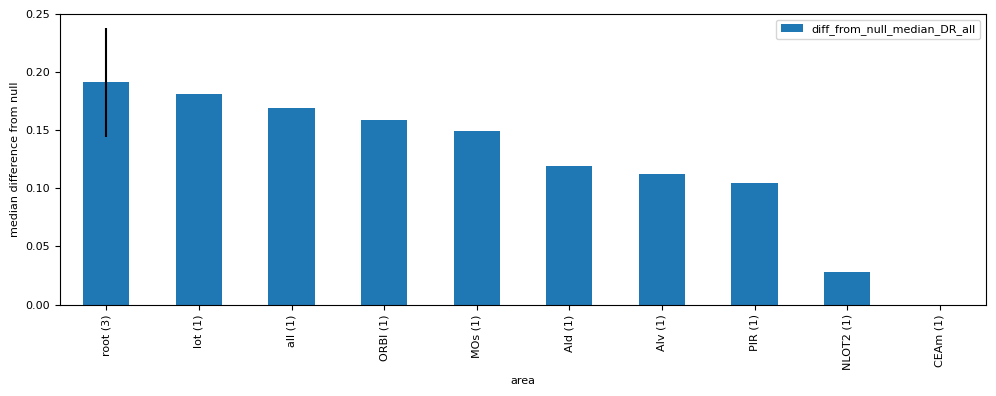

In [14]:
#barplot sorted by DR diff from median
min_n_expts=1

n_units=[]
for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
    if 'no_shift' in col:
            continue
    if len(col.split('_'))==4:
        n_units.append('_'+col.split('_')[3])
    else:
        n_units.append('')

for nu in n_units[:]:
    plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR'+nu,ascending=False)
    fig,ax=plt.subplots(1,1,figsize=(10,4))
    plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR'+nu],
                                       yerr='diff_from_null_sem_DR'+nu,ax=ax)

    ax.set_ylabel('median difference from null')
    area_labels=[]
    for i in range(plot_DR_diff_from_null_df.shape[0]):
        area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
    ax.set_xticklabels(area_labels,rotation=90,ha='center')

    ax.set_ylim([0,0.25])
    fig.tight_layout()




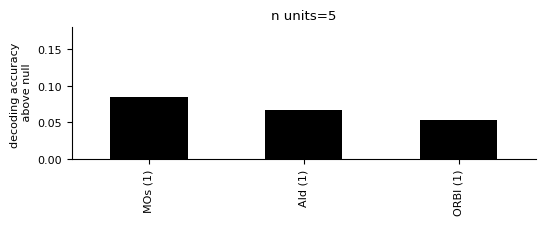

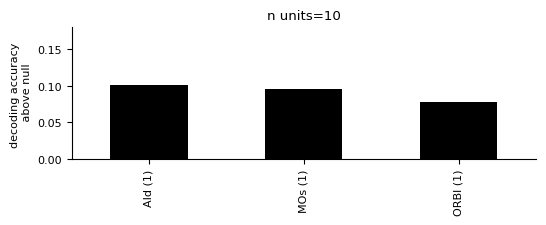

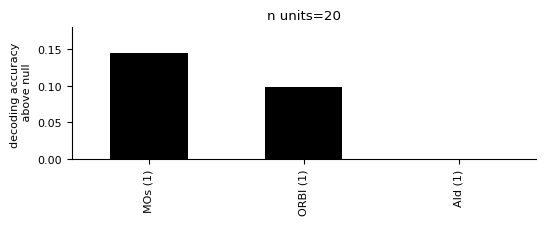

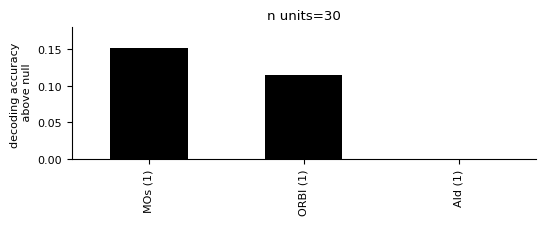

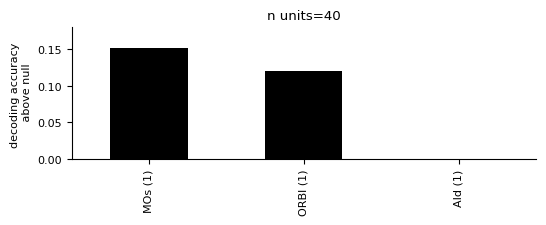

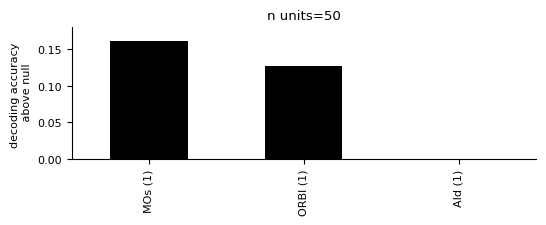

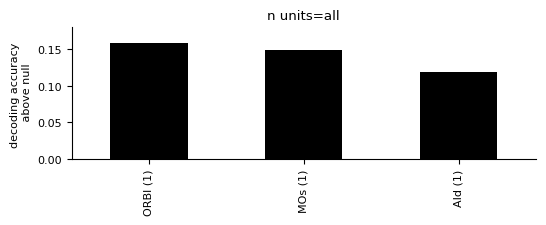

In [15]:
#plot only selected areas

#lump SC motor areas together?
orientation='vertical'
min_n_expts=1

selected_areas=['SCiw','MRN','FRP','AId','CP','ACAd','ACAv','PL','MOs','ORBl','VISal','VISpm','MOp','MD','AUDp','MGd','VISp','LGd','SCsg','GPe','PAG','SSp','SSs','SNr','RT',]

for nu in n_units[:]:
    plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR'+nu,ascending=False)
    plot_DR_diff_from_null_df=plot_DR_diff_from_null_df[plot_DR_diff_from_null_df['area'].isin(selected_areas)]

    if orientation=='vertical':
        fig,ax=plt.subplots(1,1,figsize=(5.5,2.3))
        plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR'+nu],
                                        yerr='diff_from_null_sem_DR'+nu,ax=ax,legend=False,color='k')

        ax.set_ylabel('decoding accuracy \n above null')
        area_labels=[]
        for i in range(plot_DR_diff_from_null_df.shape[0]):
            area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
        ax.set_xticklabels(area_labels,rotation=90,ha='center')

        ax.set_ylim([0,0.18])
        ax.set_xlabel('')
        ax.set_title('n units='+str(nu[1:]))
        #remove right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fig.tight_layout()
    elif orientation=='horizontal':
        fig,ax=plt.subplots(1,1,figsize=(2.5,6.5))
        plot_DR_diff_from_null_df=plot_DR_diff_from_null_df.sort_values('diff_from_null_median_DR'+nu,ascending=True)
        plot_DR_diff_from_null_df.plot.barh(x='area',y=['diff_from_null_median_DR'+nu],
                                        xerr='diff_from_null_sem_DR'+nu,ax=ax,legend=False,color='k')

        ax.set_xlabel('decoding accuracy \n above null')
        area_labels=[]
        for i in range(plot_DR_diff_from_null_df.shape[0]):
            area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
        ax.set_yticklabels(area_labels,ha='right')

        ax.set_xlim([0,0.18])
        ax.set_ylabel('')
        ax.set_title('n units='+str(nu[1:]))
        #remove right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fig.tight_layout()


In [46]:
#save figure
temp_loadpath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
savepath=os.path.join(temp_loadpath,'selected_areas_diff_from_null_DR_vertical')
fig.savefig(savepath+'.pdf',format='pdf',bbox_inches='tight',dpi=600)
fig.savefig(savepath+'.png',format='png',transparent=True, bbox_inches='tight', pad_inches=0,
            metadata=None, dpi=600)

In [27]:
# all_diff_from_null_df['area'].unique()

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\4012045211.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  plot_diff_from_null_df['n_expts_Templ'].iloc[i]=0
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\4012045211.

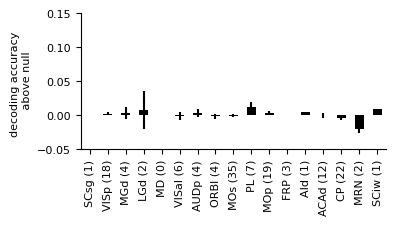

In [28]:
#plot only selected areas -- Templeton instead of DR

#lump SC motor areas together?
min_n_expts=3

selected_areas=['SCiw','MRN','FRP','AId','CP','ACAd','PL','MOs','ORBl','VISal','MOp','MD','AUDp','MGd','VISp','LGd','SCsg']

for nu in n_units[1:2]:
    plot_diff_from_null_df=all_diff_from_null_df.query('n_expts_Templ>=@min_n_expts').sort_values('diff_from_null_median_Templ'+nu,ascending=False)
    plot_diff_from_null_df=plot_DR_diff_from_null_df[plot_DR_diff_from_null_df['area'].isin(selected_areas)]
    fig,ax=plt.subplots(1,1,figsize=(4,2.3))
    plot_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_Templ'+nu],
                                    yerr='diff_from_null_sem_Templ'+nu,ax=ax,legend=False,color='k')

    ax.set_ylabel('decoding accuracy \n above null')
    area_labels=[]
    for i in range(plot_diff_from_null_df.shape[0]):
        if np.isnan(plot_diff_from_null_df['n_expts_Templ'].iloc[i]):
            plot_diff_from_null_df['n_expts_Templ'].iloc[i]=0
        area_labels.append(plot_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_diff_from_null_df['n_expts_Templ'].iloc[i]))+')')
    ax.set_xticklabels(area_labels,rotation=90,ha='center')

    ax.set_ylim([-0.05,0.15])
    ax.set_xlabel('')
    #remove right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.tight_layout()

In [ ]:
#save figure
temp_loadpath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-11-25-updated-plots_for_paper"
savepath=os.path.join(temp_loadpath,'selected_areas_diff_from_null_templ')
fig.savefig(savepath+'.pdf',format='pdf',bbox_inches='tight',dpi=600)
fig.savefig(savepath+'.png',format='png',transparent=True, bbox_inches='tight', pad_inches=0,
            metadata=None, dpi=600)

In [ ]:
all_diff_from_null_df.columns

In [ ]:
plot_DR_diff_from_null_df.query('area=="MRN"')

In [ ]:
#plot true accuracy and null median on same barplot

min_n_expts=3

plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR_20',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(10,4))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['true_accuracy_DR_20','null_median_DR_20'],ax=ax)

ax.set_ylabel('accuracy')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')

ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0.5,1.0])
fig.tight_layout()

## compare DR and Templeton

In [ ]:
#barplot sorted by fraction significant
min_n_expts=2

plot_all_frac_sig_df=all_frac_sig_df.query('n_expts_DR>=@min_n_expts and n_expts_Templ>=@min_n_expts').sort_values('frac_sig_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_all_frac_sig_df.plot.bar(x='area',y=['frac_sig_DR','frac_sig_Templ'],ax=ax)
ax.set_ylabel('fraction significant decoding')
# ax.set_xlabel('area')
ax.legend(['DR','Templ'])
ax.set_ylim([0,1])
fig.tight_layout()

In [ ]:
#barplot sorted by DR diff from median
min_n_expts=2

plot_all_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts and n_expts_Templ>=@min_n_expts').sort_values('diff_from_null_median_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_all_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR','diff_from_null_median_Templ'],ax=ax)

ax.set_ylabel('median difference from null')
# ax.set_xlabel('area')
ax.legend(['DR','Templ'])

ax.set_ylim([-0.03,0.18])
fig.tight_layout()


### compare 3 areas - DR

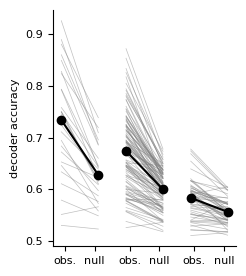

In [29]:
area1='MRN'
area2='MOs'
area3='VISp'

x_spacing=1

for nu in n_units[1:2]:

    fig,ax=plt.subplots(1,1,figsize=(2.5,2.8))

    area1_df=all_decoder_results.query('project=="DynamicRouting" and area==@area1 and n_good_blocks>=4')[['true_accuracy'+nu,'null_accuracy_median'+nu]]
    area1_values=np.vstack(area1_df.values)
    area1_mean=np.nanmean(area1_values,axis=0)

    area2_df=all_decoder_results.query('project=="DynamicRouting" and area==@area2 and n_good_blocks>=4')[['true_accuracy'+nu,'null_accuracy_median'+nu]]
    area2_values=np.vstack(area2_df.values)
    area2_mean=np.nanmean(area2_values,axis=0)

    area3_df=all_decoder_results.query('project=="DynamicRouting" and area==@area3 and n_good_blocks>=4')[['true_accuracy'+nu,'null_accuracy_median'+nu]]
    area3_values=np.vstack(area3_df.values)
    area3_mean=np.nanmean(area3_values,axis=0)


    ax.plot([0,1],area1_values.T,'-',linewidth=0.5,color='gray',alpha=0.5)
    ax.plot([0,1],area1_mean,'ko-')
    ax.plot([1.75,2.75],area2_values.T,'-',linewidth=0.5,color='gray',alpha=0.5)
    ax.plot([1.75,2.75],area2_mean,'ko-')
    ax.plot([3.5,4.5],area3_values.T,'-',linewidth=0.5,color='gray',alpha=0.5)
    ax.plot([3.5,4.5],area3_mean,'ko-')

    ax.set_xticks([0.1,0.9,1.75+0.1,2.75-0.1,3.5+0.1,4.5-0.1])
    ax.set_xticklabels(['obs.','null','obs.','null','obs.','null'])

    #label axis with areas
    ax.set_ylabel('decoder accuracy')

    # ax.set_title(area1+' vs. '+area2+' ('+nu+' units)')

    #remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    fig.tight_layout()

In [30]:
#save figure
savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
fig.savefig(os.path.join(savepath,area1+'_'+area2+'_'+area3+'_accuracy_comparison_.png'),format='png',bbox_inches='tight',dpi=600)
fig.savefig(os.path.join(savepath,area1+'_'+area2+'_'+area3+'_accuracy_comparison_.pdf'),format='pdf',bbox_inches='tight',dpi=600)

In [ ]:
##"bad" behavior mice
sel_mice='699847|703333|703882|706401'
sel_area='SCiw'
np.mean((all_decoder_results.query('session_id.str.contains(@sel_mice) and area==@sel_area')['true_accuracy_20']-
         all_decoder_results.query('session_id.str.contains(@sel_mice) and area==@sel_area')['null_accuracy_median_20']))

In [ ]:
sel_mice='699847|703333|703882|706401'
bad_mice_results=all_decoder_results.query('session_id.str.contains(@sel_mice)')
bad_mice_results_by_area={
    'area':[],
    'n_expts':[],
    'diff_from_null_median_20':[],
    'diff_from_null_sem_20':[],
    'diff_from_null_median_all':[],
    'diff_from_null_sem_all':[],
}

for area in bad_mice_results['area'].unique():
    bad_mice_results_by_area['area'].append(area)
    bad_mice_results_by_area['n_expts'].append(len(bad_mice_results.query('area==@area')['n_units'].values))
    bad_mice_results_by_area['diff_from_null_median_20'].append(np.mean(bad_mice_results.query('area==@area')['true_accuracy_20'].values-
                                                                bad_mice_results.query('area==@area')['null_accuracy_median_20'].values))
    bad_mice_results_by_area['diff_from_null_sem_20'].append(stats.sem(bad_mice_results.query('area==@area')['true_accuracy_20'].values-
                                                                bad_mice_results.query('area==@area')['null_accuracy_median_20'].values))
    
    bad_mice_results_by_area['diff_from_null_median_all'].append(np.mean(bad_mice_results.query('area==@area')['true_accuracy_all'].values-
                                                                bad_mice_results.query('area==@area')['null_accuracy_median_all'].values))
    bad_mice_results_by_area['diff_from_null_sem_all'].append(stats.sem(bad_mice_results.query('area==@area')['true_accuracy_all'].values-
                                                                bad_mice_results.query('area==@area')['null_accuracy_median_all'].values))

bad_mice_results_by_area=pd.DataFrame(bad_mice_results_by_area)
bad_mice_results_by_area


In [31]:
#plot only selected areas

#lump SC motor areas together?
min_n_expts=3

selected_areas=['SCiw','MRN','FRP','AId','CP','ACAd','PL','MOs','ORBl','VISal','MOp','MD','AUDp','MGd','VISp','LGd','SCsg']

for nu in n_units[:1]:
    plot_DR_diff_from_null_df=bad_mice_results_by_area.sort_values('diff_from_null_median'+nu,ascending=False)
    plot_DR_diff_from_null_df=plot_DR_diff_from_null_df[plot_DR_diff_from_null_df['area'].isin(selected_areas)]
    fig,ax=plt.subplots(1,1,figsize=(4,2.3))
    plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median'+nu],
                                       yerr='diff_from_null_sem'+nu,ax=ax,legend=False,color='k')

    ax.set_ylabel('decoding accuracy \n above null')
    area_labels=[]
    for i in range(plot_DR_diff_from_null_df.shape[0]):
        area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts'].iloc[i]))+')')
    ax.set_xticklabels(area_labels,rotation=90,ha='center')

    ax.set_ylim([0,0.17])
    ax.set_xlabel('')
    #remove right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.tight_layout()


NameError: name 'bad_mice_results_by_area' is not defined

In [ ]:
all_decoder_results.query('n_good_blocks==6').groupby('session_id').size().sort_values()

In [ ]:
# 667252_2023-09-26 - CP, MRN, SC, VISp
# 668755_2023-08-31 = ACA, MOs, ORB, SC
# 664851_2023-11-16 = ACA, FRP, MOs, ORB, PL
# 702131_2024-02-26 = ACA, lots of CP, MOs, 
all_decoder_results.query('session_id=="702131_2024-02-26"')

In [ ]:
# all_diff_from_null_df

In [ ]:
#plot decoder accuracy vs number of units

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-11-05-n_units_per_area\decoder_acc_by_n_units_partial"

unique_areas=all_decoder_results['area'].unique()
n_units=[]
n_units_int=[]
for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
    if len(col.split('_'))==4:
        if col.split('_')[3]=='all':
            continue

        n_units.append('_'+col.split('_')[3])
        n_units_int.append(int(col.split('_')[3]))
        
    else:
        n_units.append('')
        n_units_int.append(None)


for area in unique_areas[:]:
    area_df=all_diff_from_null_df.query('area==@area')

    temp_accuracy=[]
    temp_sem=[]

    for nu in n_units:
        if nu=='all':
            continue
        if len(area_df['diff_from_null_median_DR'+nu].values)==0:
            continue
        temp_accuracy.append(area_df['diff_from_null_median_DR'+nu].values[0])
        temp_sem.append(area_df['diff_from_null_sem_DR'+nu].values[0])

    if len(temp_accuracy)==0:
        continue

    temp_accuracy=np.array(temp_accuracy)
    temp_sem=np.array(temp_sem)

    fig,ax=plt.subplots(1,1,figsize=(4,3))
    ax.axhline(y=0,color='k',linestyle='--',alpha=0.5)
    ax.errorbar(n_units_int,temp_accuracy,yerr=temp_sem,color='k',marker='.',linestyle='-')
    ax.set_xlabel('number of units')
    ax.set_ylabel('decoder accuracy above null')
    ax.set_title(area)
    ax.set_ylim([-0.05,0.25])

    fig.savefig(os.path.join(savepath,area+'_decoder_acc_by_n_units.png'),format='png',bbox_inches='tight')
    plt.close(fig)


In [ ]:
#average across areas

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-11-05-n_units_per_area\decoder_acc_by_n_units_partial"

unique_areas=all_decoder_results['area'].unique()
n_units=[]
n_units_int=[]
for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
    if len(col.split('_'))==4:
        if col.split('_')[3]=='all':
            continue

        n_units.append('_'+col.split('_')[3])
        n_units_int.append(int(col.split('_')[3]))
        
    else:
        n_units.append('')
        n_units_int.append(None)



# for area in unique_areas[:]:
area='MOs'
area_df=all_diff_from_null_df.query('area==@area')

temp_accuracy=[]
temp_sem=[]

for nu in n_units:
    if nu=='all':
        continue
    if len(area_df['diff_from_null_median_DR'+nu].values)==0:
        continue
    temp_accuracy.append(area_df['diff_from_null_median_DR'+nu].values[0])
    temp_sem.append(area_df['diff_from_null_sem_DR'+nu].values[0])

# if len(temp_accuracy)==0:
#     continue

temp_accuracy=np.array(temp_accuracy)
temp_sem=np.array(temp_sem)

fig,ax=plt.subplots(1,1,figsize=(4,3))
# ax.axhline(y=0,color='k',linestyle='--',alpha=0.5)
ax.errorbar(n_units_int,temp_accuracy,yerr=temp_sem,color='k',marker='.',linestyle='-')
ax.set_xlabel('number of units')
ax.set_ylabel('decoder accuracy above null')
ax.set_title(area)
# ax.set_ylim([-0.05,0.25])

# fig.savefig(os.path.join(savepath,area+'_decoder_acc_by_n_units_.png'),format='png',bbox_inches='tight')
# plt.close(fig)


In [ ]:
all_diff_from_null_df['area'].unique()

In [13]:
from iblatlas.atlas import BrainRegions
br = BrainRegions()
br.acronym

array(['void', 'root', 'grey', ..., 'pfs', 'IPF', 'retina'], dtype=object)

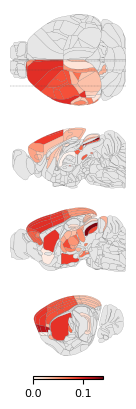

In [34]:
#barplot sorted by DR diff from median
min_n_expts=3

# n_units=[]
# for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
#     if len(col.split('_'))==4:
#         n_units.append('_'+col.split('_')[3])
#     else:
#         n_units.append('')

nu='_all'

excl_area_df=all_diff_from_null_df.copy()
unique_areas=all_diff_from_null_df['area'].unique()
excl_areas=["CTXpl","OLF","HPF","CTXsp","STR","PAL","TH","HY","MB","HB","P","MY","CB","VL","SEZ",]

for aa in unique_areas:
    if aa in excl_areas:
        excl_area_df=excl_area_df.query('area!=@aa')
    if aa[0].islower():
        excl_area_df=excl_area_df.query('area!=@aa')


plot_DR_diff_from_null_df=excl_area_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR'+nu,ascending=False)

decoder_accuracy_df=plot_DR_diff_from_null_df.copy()

fig=plot_utils.plot_brain_heatmap(regions=plot_DR_diff_from_null_df['area'].values,
                              values=plot_DR_diff_from_null_df['diff_from_null_median_DR'+nu].values,
                              sagittal_planes=[-150,-1250,-3000],
                              clevels=(0,0.14))

In [ ]:
# aa[0].islower()

In [35]:
figsavepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
fig.savefig(os.path.join(figsavepath,'diff_from_null_DR'+nu+'_heatmap.png'),format='png',bbox_inches='tight',dpi=600)
fig.savefig(os.path.join(figsavepath,'diff_from_null_DR'+nu+'_heatmap.pdf'),format='pdf',bbox_inches='tight',dpi=600)

In [ ]:
#trialwise

In [12]:
#load data
n_units='_20_units'
# savepath=r"D:\decoding_results_from_CO\n_units_test_2024-11-06"
# savepath=r"D:\decoding_results_from_CO\n_units_test_medium_unit_criteria_2024-11-07"
# savepath=r"D:\decoding_results_from_CO\lda_test_2024-11-11"
# savepath=r"D:\decoding_results_from_CO\logreg_re_concat_2024-11-25"
savepath=r"D:\decoding_results_from_CO\logreg_2024-11-27"

decoder_confidence_versus_response_type=pd.read_pickle(os.path.join(savepath,'decoder_confidence_versus_response_type'+n_units+'.pkl'))
decoder_confidence_dprime_by_block=pd.read_pickle(os.path.join(savepath,'decoder_confidence_dprime_by_block'+n_units+'.pkl'))
decoder_confidence_by_switch=pd.read_pickle(os.path.join(savepath,'decoder_confidence_by_switch'+n_units+'.pkl'))
decoder_confidence_versus_trials_since_rewarded_target=pd.read_pickle(os.path.join(savepath,'decoder_confidence_versus_trials_since_rewarded_target'+n_units+'.pkl'))
decoder_confidence_before_after_target=pd.read_pickle(os.path.join(savepath,'decoder_confidence_before_after_target'+n_units+'.pkl'))


In [ ]:
decoder_confidence_versus_response_type.columns

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\1133062283.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_confidence']-sel_area['fa_all_confidence'],nan_policy='omit'))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\1133062283.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_confidence']-sel_area['fa_all_confidence'],nan_policy='omit'))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\1133062283.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr

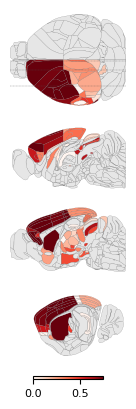

In [77]:
# dprime_threshold=1.0
sel_project='DynamicRouting'
min_n_sessions=3

cr_fa_diff_by_area={
    'area':[],
    'n_sessions':[],
    'cr_fa_diff':[],
    'cr_fa_diff_sem':[],
}

for aa in decoder_confidence_versus_response_type['area'].unique():
    # sel_area=decoder_confidence_versus_response_type.query('area==@aa and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and project.str.contains(@sel_project)')
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and n_good_blocks>=4 and project.str.contains(@sel_project)')
    cr_fa_diff_by_area['area'].append(aa)
    cr_fa_diff_by_area['n_sessions'].append(len(sel_area))
    cr_fa_diff_by_area['cr_fa_diff'].append(np.nanmean(sel_area['cr_all_confidence']-sel_area['fa_all_confidence']))
    cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_confidence']-sel_area['fa_all_confidence'],nan_policy='omit'))

cr_fa_diff_by_area=pd.DataFrame(cr_fa_diff_by_area)

# plot_data=cr_fa_diff_by_area.query('n_sessions>=@min_n_sessions').sort_values(by='cr_fa_diff',ascending=False)
excl_area_df=cr_fa_diff_by_area.copy()
unique_areas=cr_fa_diff_by_area['area'].unique()
excl_areas=["CTXpl","OLF","HPF","CTXsp","STR","PAL","TH","HY","MB","HB","P","MY","CB","VL","SEZ",]

for aa in unique_areas:
    if aa in excl_areas:
        excl_area_df=excl_area_df.query('area!=@aa')
    if aa[0].islower():
        excl_area_df=excl_area_df.query('area!=@aa')

plot_DR_diff_from_null_df=excl_area_df.query('n_sessions>=@min_n_sessions').sort_values('cr_fa_diff',ascending=False)

cr_fa_confidence_df=plot_DR_diff_from_null_df.copy()

fig=plot_utils.plot_brain_heatmap(regions=plot_DR_diff_from_null_df['area'].values,
                              values=plot_DR_diff_from_null_df['cr_fa_diff'].values,
                              sagittal_planes=[-150,-1250,-3000],
                              clevels=(0,0.75))


In [ ]:
# decoder_confidence_versus_response_type.columns

In [ ]:
# decoder_confidence_versus_response_type.query('project=="DynamicRouting" and area=="FRP"')['fa_all_confidence']

In [38]:
figsavepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
fig.savefig(os.path.join(figsavepath,'cr_fa_diff'+nu+'_heatmap.png'),format='png',bbox_inches='tight',dpi=600)
fig.savefig(os.path.join(figsavepath,'cr_fa_diff'+nu+'_heatmap.pdf'),format='pdf',bbox_inches='tight',dpi=600)

Text(0, 0.5, 'decoder accuracy above null')

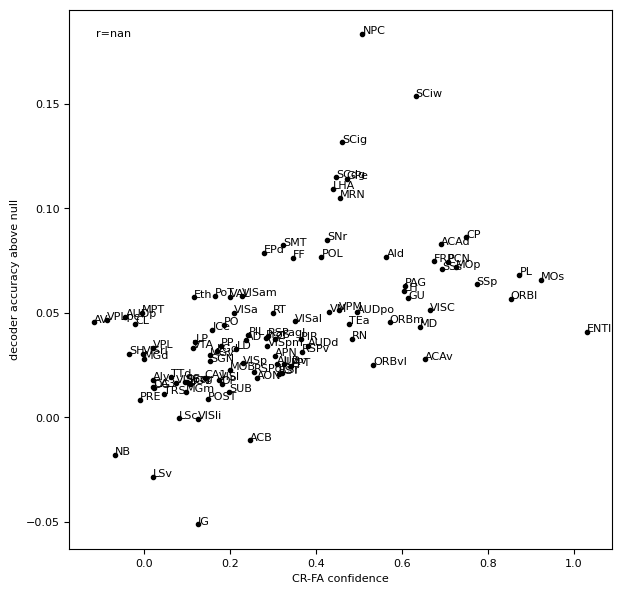

In [78]:
merge_df=pd.merge(cr_fa_confidence_df, decoder_accuracy_df, on='area', how='inner')

#plot scatter
fig,ax=plt.subplots(1,1,figsize=(7,7))
#plot unity line
# ax.plot([-0.02,0.3],[-0.02,0.3],'k--',alpha=0.5)
ax.plot(merge_df['cr_fa_diff'],merge_df['diff_from_null_median_DR_20'],'k.')
#plot area name above each point
for i in range(merge_df.shape[0]):
    ax.text(merge_df['cr_fa_diff'].iloc[i],merge_df['diff_from_null_median_DR_20'].iloc[i],merge_df['area'].iloc[i])
ax.text(0.05,0.95,'r='+str(np.round(stats.pearsonr(merge_df['cr_fa_diff'],merge_df['diff_from_null_median_DR_20'])[0],2)),transform=ax.transAxes)
ax.set_xlabel('CR-FA confidence')
ax.set_ylabel('decoder accuracy above null')

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\175429257.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_predict_proba']-sel_area['fa_all_predict_proba'],nan_policy='omit'))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\175429257.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_predict_proba']-sel_area['fa_all_predict_proba'],nan_policy='omit'))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_12340\175429257.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel

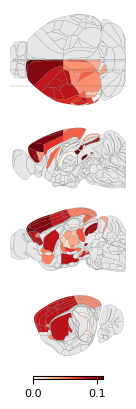

In [79]:
#predict_proba version
dprime_threshold=1.0
sel_project='DynamicRouting'
min_n_sessions=3

cr_fa_diff_by_area={
    'area':[],
    'n_sessions':[],
    'cr_fa_diff':[],
    'cr_fa_diff_sem':[],
}

for aa in decoder_confidence_versus_response_type['area'].unique():
    # sel_area=decoder_confidence_versus_response_type.query('area==@aa and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and project.str.contains(@sel_project)')
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and n_good_blocks>=4 and project.str.contains(@sel_project)')
    cr_fa_diff_by_area['area'].append(aa)
    cr_fa_diff_by_area['n_sessions'].append(len(sel_area))
    cr_fa_diff_by_area['cr_fa_diff'].append(np.nanmean(sel_area['cr_all_predict_proba']-sel_area['fa_all_predict_proba']))
    cr_fa_diff_by_area['cr_fa_diff_sem'].append(stats.sem(sel_area['cr_all_predict_proba']-sel_area['fa_all_predict_proba'],nan_policy='omit'))

cr_fa_diff_by_area=pd.DataFrame(cr_fa_diff_by_area)

# plot_data=cr_fa_diff_by_area.query('n_sessions>=@min_n_sessions').sort_values(by='cr_fa_diff',ascending=False)
excl_area_df=cr_fa_diff_by_area.copy()
unique_areas=cr_fa_diff_by_area['area'].unique()
excl_areas=["CTXpl","OLF","HPF","CTXsp","STR","PAL","TH","HY","MB","HB","P","MY","CB","VL","SEZ",]

for aa in unique_areas:
    if aa in excl_areas:
        excl_area_df=excl_area_df.query('area!=@aa')
    if aa[0].islower():
        excl_area_df=excl_area_df.query('area!=@aa')

plot_DR_diff_from_null_df=excl_area_df.query('n_sessions>=@min_n_sessions').sort_values('cr_fa_diff',ascending=False)

cr_fa_predict_proba_df=plot_DR_diff_from_null_df.copy()

fig=plot_utils.plot_brain_heatmap(regions=plot_DR_diff_from_null_df['area'].values,
                              values=plot_DR_diff_from_null_df['cr_fa_diff'].values,
                              sagittal_planes=[-150,-1250,-3000],
                              clevels=(0,0.11))


In [42]:
figsavepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
fig.savefig(os.path.join(figsavepath,'cr_fa_proba_diff'+nu+'_heatmap.png'),format='png',bbox_inches='tight',dpi=600)
fig.savefig(os.path.join(figsavepath,'cr_fa_proba_diff'+nu+'_heatmap.pdf'),format='pdf',bbox_inches='tight',dpi=600)

Text(0, 0.5, 'decoder accuracy above null')

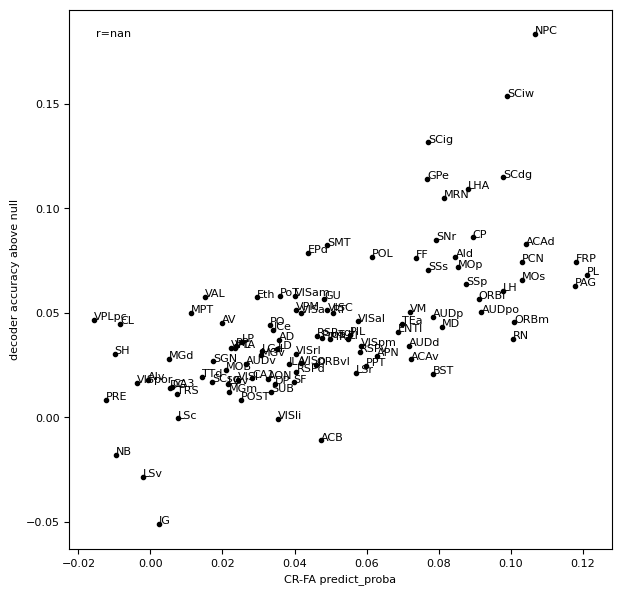

In [80]:
merge_df=pd.merge(cr_fa_predict_proba_df, decoder_accuracy_df, on='area', how='inner')

#plot scatter
fig,ax=plt.subplots(1,1,figsize=(7,7))
#plot unity line
# ax.plot([-0.02,0.3],[-0.02,0.3],'k--',alpha=0.5)
ax.plot(merge_df['cr_fa_diff'],merge_df['diff_from_null_median_DR_20'],'k.')
#plot area name above each point
for i in range(merge_df.shape[0]):
    ax.text(merge_df['cr_fa_diff'].iloc[i],merge_df['diff_from_null_median_DR_20'].iloc[i],merge_df['area'].iloc[i])
ax.text(0.05,0.95,'r='+str(np.round(stats.pearsonr(merge_df['cr_fa_diff'],merge_df['diff_from_null_median_DR_20'])[0],2)),transform=ax.transAxes)
ax.set_xlabel('CR-FA predict_proba')
ax.set_ylabel('decoder accuracy above null')

In [ ]:
nu

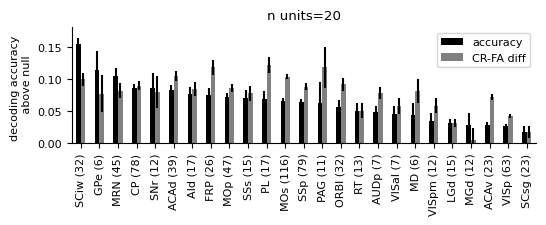

In [81]:
#predict_proba bar plot
#plot only selected areas

#lump SC motor areas together?
min_n_expts=3

selected_areas=['SCiw','MRN','FRP','AId','CP','ACAd','ACAv','PL','MOs','ORBl','VISal','VISpm','MOp','MD','AUDp','MGd','VISp','LGd','SCsg','GPe','PAG','SSp','SSs','SNr','RT',]

nu='_20'

plot_DR_diff_from_null_df=merge_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR'+nu,ascending=False)
# plot_DR_diff_from_null_df['cr_fa_diff']=plot_DR_diff_from_null_df['cr_fa_diff']*-1
plot_DR_diff_from_null_df=plot_DR_diff_from_null_df[plot_DR_diff_from_null_df['area'].isin(selected_areas)]
fig,ax=plt.subplots(1,1,figsize=(5.5,2.3))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR'+nu,'cr_fa_diff'],
                                    yerr='diff_from_null_sem_DR'+nu,ax=ax,legend=True,
                                    label=['accuracy','CR-FA diff'],color=['k','grey'])

ax.set_ylabel('decoding accuracy \n above null')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0,0.18])
ax.set_xlabel('')
ax.set_title('n units='+str(nu[1:]))
#remove right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()



In [50]:
#save figure
temp_loadpath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-02-new-plots-for-paper-logreg"
savepath=os.path.join(temp_loadpath,'selected_areas_accuracy_cr_fa_diff_DR')
fig.savefig(savepath+'.pdf',format='pdf',bbox_inches='tight',dpi=600)
fig.savefig(savepath+'.png',format='png',transparent=True, bbox_inches='tight', pad_inches=0,
            metadata=None, dpi=600)

In [ ]:
# decoder_accuracy

Index(['area', 'n_expts_DR', 'diff_from_null_mean_DR_10',
       'diff_from_null_median_DR_10', 'diff_from_null_sem_DR_10',
       'true_accuracy_DR_10', 'true_accuracy_sem_DR_10', 'null_median_DR_10',
       'null_median_sem_DR_10', 'diff_from_null_mean_DR_20',
       'diff_from_null_median_DR_20', 'diff_from_null_sem_DR_20',
       'true_accuracy_DR_20', 'true_accuracy_sem_DR_20', 'null_median_DR_20',
       'null_median_sem_DR_20', 'diff_from_null_mean_DR_40',
       'diff_from_null_median_DR_40', 'diff_from_null_sem_DR_40',
       'true_accuracy_DR_40', 'true_accuracy_sem_DR_40', 'null_median_DR_40',
       'null_median_sem_DR_40', 'diff_from_null_mean_DR_all',
       'diff_from_null_median_DR_all', 'diff_from_null_sem_DR_all',
       'true_accuracy_DR_all', 'true_accuracy_sem_DR_all',
       'null_median_DR_all', 'null_median_sem_DR_all', 'n_expts_Templ',
       'diff_from_null_mean_Templ_10', 'diff_from_null_median_Templ_10',
       'diff_from_null_sem_Templ_10', 'true_accuracy_T

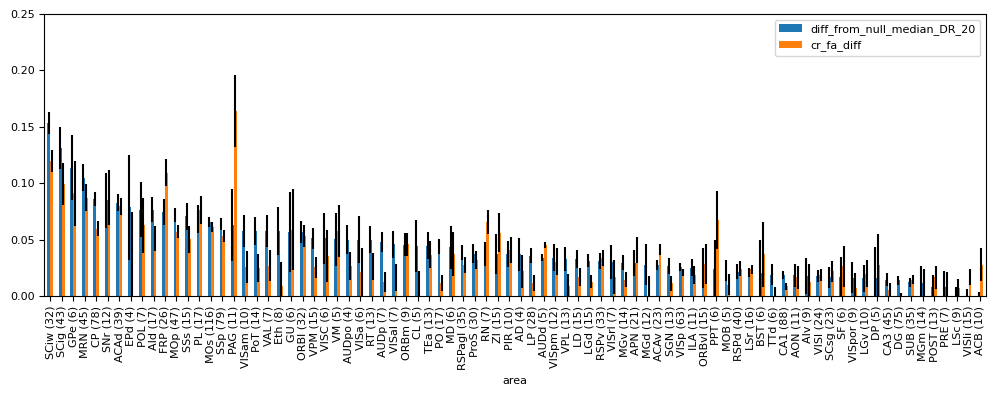

In [53]:
#barplot sorted by DR diff from median
#also plot CR-FA diff
min_n_expts=3

nu='_20'

plot_DR_diff_from_null_df=merge_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR'+nu,ascending=False)
# plot_DR_diff_from_null_df['cr_fa_diff']=plot_DR_diff_from_null_df['cr_fa_diff']*-1
fig,ax=plt.subplots(1,1,figsize=(10,4))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR'+nu,'cr_fa_diff'],
                                    yerr='diff_from_null_sem_DR'+nu,ax=ax)

# ax.set_ylabel('median difference from null')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0,0.25])
fig.tight_layout()




Text(0, 0.5, 'CR-FA confidence')

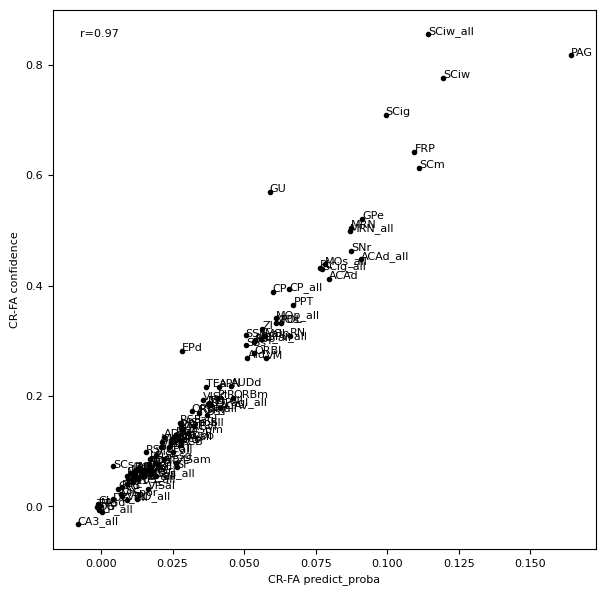

In [57]:
merge_df=pd.merge(cr_fa_predict_proba_df, cr_fa_confidence_df, on='area', how='inner')

#plot scatter
fig,ax=plt.subplots(1,1,figsize=(7,7))
#plot unity line
# ax.plot([-0.02,0.3],[-0.02,0.3],'k--',alpha=0.5)
ax.plot(merge_df['cr_fa_diff_x'],merge_df['cr_fa_diff_y'],'k.')
#plot area name above each point
for i in range(merge_df.shape[0]):
    ax.text(merge_df['cr_fa_diff_x'].iloc[i],merge_df['cr_fa_diff_y'].iloc[i],merge_df['area'].iloc[i])
ax.text(0.05,0.95,'r='+str(np.round(stats.pearsonr(merge_df['cr_fa_diff_x'],merge_df['cr_fa_diff_y'])[0],2)),transform=ax.transAxes)
ax.set_xlabel('CR-FA predict_proba')
ax.set_ylabel('CR-FA confidence')

In [ ]:
# merge_df=pd.merge(cr_fa_predict_proba_df, cr_fa_confidence_df, on='area', how='inner')
# merge_df.columns

In [ ]:
decoder_confidence_versus_trials_since_rewarded_target.columns

In [72]:
decoder_confidence_versus_trials_since_rewarded_target.query('project.str.contains("Templeton")')['session'].unique()

array(['620263_2022-07-26', '620263_2022-07-27', '620264_2022-08-02',
       '628801_2022-09-19', '628801_2022-09-20', '636397_2022-09-26',
       '636397_2022-09-27', '644547_2022-12-05', '644547_2022-12-06',
       '646318_2023-01-17', '646318_2023-01-18', '649944_2023-02-27',
       '649944_2023-02-28', '662983_2023-05-15', '662983_2023-05-16',
       '668759_2023-07-12', '670180_2023-07-26', '670180_2023-07-27',
       '670181_2023-07-18', '670181_2023-07-20', '670248_2023-08-01',
       '670248_2023-08-03'], dtype=object)

In [ ]:
decoder_confidence_versus_trials_since_rewarded_target.query('n_good_blocks==6')['session'].unique()

In [14]:
# decoder_confidence_versus_trials_since_rewarded_target.query('session=="668759_2023-07-12"')['area'].unique()
decoder_confidence_versus_trials_since_rewarded_target.query('session=="713655_2024-08-05"')['area'].unique()

array(['AIp', 'CA1', 'CTXsp', 'DG', 'MRN', 'RSPd', 'SCdg', 'SCiw', 'SCsg',
       'SSp', 'SSs', 'TEa', 'VISC', 'VISp', 'all', 'MB_all', 'MRN_all',
       'RSPd_all', 'SCig_all', 'SCiw_all', 'SCsg_all', 'SSp_all',
       'SSs_all', 'VISC_all', 'SCm'], dtype=object)

In [ ]:
decoder_confidence_versus_trials_since_rewarded_target.query('session=="713655_2024-08-05" and area=="SCiw"')

In [9]:
import npc_lims

In [ ]:
# session_area_df=all_decoder_results.query('session_id==@sel_session_id and area==@sel_area')
# session_area_df['true_accuracy_20'].iloc[0]-session_area_df['null_accuracy_median_20'].iloc[0]

0.2073394220955197

Text(0.5, 1.0, '713655_2024-08-05 MRN; decoder accuracy above null=0.17')

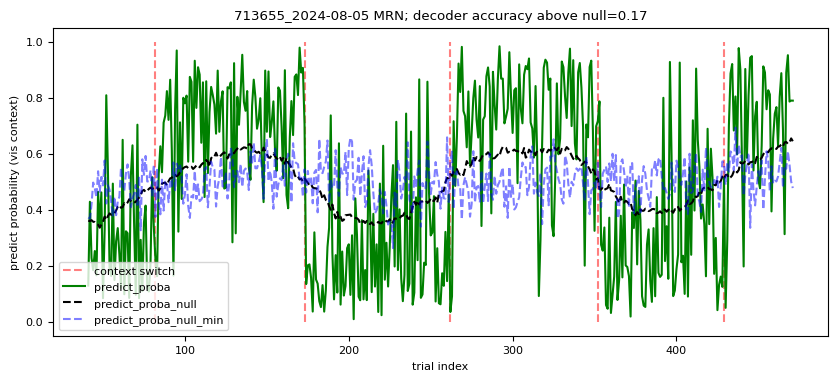

In [19]:
sel_session_id='713655_2024-08-05'
# sel_session_id='668759_2023-07-12'
sel_area='MRN'
trials=pd.read_parquet(npc_lims.get_cache_path('trials',sel_session_id,version='any'))
switch_trial_idx=trials.query('is_context_switch').index.values

session_area_df=all_decoder_results.query('session_id==@sel_session_id and area==@sel_area')
decoder_acc_temp=session_area_df['true_accuracy_all'].iloc[0]-session_area_df['null_accuracy_median_all'].iloc[0]

if len(switch_trial_idx)==0:
    start_time=trials['start_time'].iloc[0]
    fake_context=np.full(len(trials), fill_value='nan')
    fake_block_nums=np.full(len(trials), fill_value=np.nan)
    block_context_names=['vis','aud']

    if np.random.choice(block_context_names,1)=='vis':
        block_contexts=['vis','aud','vis','aud','vis','aud']
    else:
        block_contexts=['aud','vis','aud','vis','aud','vis']

    for block in range(0,6):
        block_start_time=start_time+block*10*60
        block_end_time=start_time+(block+1)*10*60
        block_trials=trials[:].query('start_time>=@block_start_time').index
        fake_context[block_trials]=block_contexts[block]
        fake_block_nums[block_trials]=block
    trials['block_index']=fake_block_nums
    trials['context_name']=fake_context
    switch_trial_idx=np.where(trials['context_name'].iloc[:-1].values!=trials['context_name'].iloc[1:].values)[0]

trial_idx=decoder_confidence_versus_trials_since_rewarded_target.query('session==@sel_session_id and area==@sel_area')['trial_index'].values[0]
predict_proba_values=decoder_confidence_versus_trials_since_rewarded_target.query('session==@sel_session_id and area==@sel_area')['predict_proba'].values[0]
predict_proba_null_values=decoder_confidence_versus_trials_since_rewarded_target.query('session==@sel_session_id and area==@sel_area')['predict_proba_null'].values[0]
predict_proba_null_min_values=decoder_confidence_versus_trials_since_rewarded_target.query('session==@sel_session_id and area==@sel_area')['predict_proba_null_min'].values[0]

fig,ax=plt.subplots(1,1,figsize=(10,4))
ax.vlines(x=switch_trial_idx,ymin=0,ymax=1,color='r',linestyle='--',alpha=0.5,label='context switch')
ax.plot(trial_idx,predict_proba_values,'g-',label='predict_proba')
ax.plot(trial_idx,predict_proba_null_values,'k--',label='predict_proba_null')
ax.plot(trial_idx,predict_proba_null_min_values,'b--',label='predict_proba_null_min',alpha=0.5)
ax.legend()
ax.set_ylabel('predict probability (vis context)')
ax.set_xlabel('trial index')
ax.set_title(sel_session_id+' '+sel_area+'; decoder accuracy above null='+str(np.round(decoder_acc_temp,2)))



In [35]:
#CA1 decoding results
CA1_decoder_results=all_decoder_results.query('area=="CA1" and project=="DynamicRouting" and n_good_blocks>=4 and probe!="all"')
CA1_decoder_results['diff_from_null_20']=CA1_decoder_results['true_accuracy_20']-CA1_decoder_results['null_accuracy_median_20']

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_26204\3296666943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA1_decoder_results['diff_from_null_20']=CA1_decoder_results['true_accuracy_20']-CA1_decoder_results['null_accuracy_median_20']


In [36]:
CA1_decoder_results.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'session_id', 'project', 'area',
       'ccf_ap_mean', 'ccf_dv_mean', 'ccf_ml_mean', 'n_units', 'probe',
       'cross_modal_dprime', 'n_good_blocks', 'true_accuracy_10',
       'null_accuracy_mean_10', 'null_accuracy_median_10',
       'null_accuracy_std_10', 'p_value_10', 'true_accuracy_20',
       'null_accuracy_mean_20', 'null_accuracy_median_20',
       'null_accuracy_std_20', 'p_value_20', 'true_accuracy_40',
       'null_accuracy_mean_40', 'null_accuracy_median_40',
       'null_accuracy_std_40', 'p_value_40', 'true_accuracy_all',
       'null_accuracy_mean_all', 'null_accuracy_median_all',
       'null_accuracy_std_all', 'p_value_all', 'diff_from_null_20'],
      dtype='object')

Text(0.5, 0, 'decoder accuracy above null')

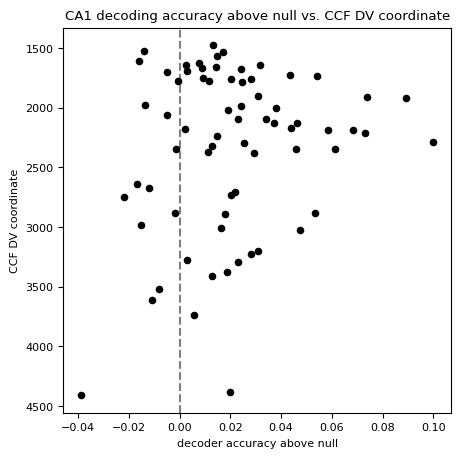

In [37]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.axvline(0,color='k',linestyle='--',alpha=0.5)
CA1_decoder_results.plot.scatter(x='diff_from_null_20',y='ccf_dv_mean',ax=ax,color='k')
ax.invert_yaxis()
ax.set_title('CA1 decoding accuracy above null vs. CCF DV coordinate')
ax.set_ylabel('CCF DV coordinate')
ax.set_xlabel('decoder accuracy above null')